In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [7]:
#Use the citypy module to detemine city based on latitude and longitude
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [11]:
#Import the requests library
import requests
#Import the API key
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [18]:
#Create an endpoint URL for city.
city_url = url + "&q=" + "Boston"

In [20]:
#Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [21]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [22]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [23]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":58.01,"feels_like":56.66,"temp_min":54.91,"temp_max":61.09,"pressure":1018,"humidity":67},"visibility":10000,"wind":{"speed":5.01,"deg":360,"gust":14},"clouds":{"all":75},"dt":1633037310,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1632998420,"sunset":1633040867},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [24]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 58.01,
  'feels_like': 56.66,
  'temp_min': 54.91,
  'temp_max': 61.09,
  'pressure': 1018,
  'humidity': 67},
 'visibility': 10000,
 'wind': {'speed': 5.01, 'deg': 360, 'gust': 14},
 'clouds': {'all': 75},
 'dt': 1633037310,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1632998420,
  'sunset': 1633040867},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [25]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [26]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [27]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 58.01,
  'feels_like': 56.66,
  'temp_min': 54.91,
  'temp_max': 61.09,
  'pressure': 1018,
  'humidity': 67},
 'visibility': 10000,
 'wind': {'speed': 5.01, 'deg': 360, 'gust': 14},
 'clouds': {'all': 75},
 'dt': 1633037310,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1632998420,
  'sunset': 1633040867},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [28]:
# Get the JSON data.
boston_data = city_weather.json()

In [30]:
boston_data['sys']['country']

'US'

In [31]:
boston_data['dt']

1633037310

In [32]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 61.09 67 75 5.01


In [34]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-09-30 21:28:30'

In [37]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in our list.
for i, city in enumerate(cities):
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL,record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count
    record_count += 1
    
    #Run an API request for each of the cities
    try:
        #parse the JSON and retreve data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | temaraia
City not found. Skipping...
Processing Record 3 of Set 1 | pilao arcado
City not found. Skipping...
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | beloha
Processing Record 6 of Set 1 | nanortalik
Processing Record 7 of Set 1 | lompoc
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | pergamino
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | podgornoye
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | nome
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | chokwe
Processing Record 21 of Set 1 | mahebourg
Processing Record 22 of Set 1 | m

Processing Record 43 of Set 4 | bansgaon
Processing Record 44 of Set 4 | fairbanks
Processing Record 45 of Set 4 | azrow
City not found. Skipping...
Processing Record 46 of Set 4 | sozopolis
City not found. Skipping...
Processing Record 47 of Set 4 | beringovskiy
Processing Record 48 of Set 4 | san cristobal
Processing Record 49 of Set 4 | kemijarvi
Processing Record 50 of Set 4 | ous
Processing Record 1 of Set 5 | provideniya
Processing Record 2 of Set 5 | qasigiannguit
Processing Record 3 of Set 5 | romitan
Processing Record 4 of Set 5 | noumea
Processing Record 5 of Set 5 | karratha
Processing Record 6 of Set 5 | coos bay
Processing Record 7 of Set 5 | kabare
Processing Record 8 of Set 5 | jumla
Processing Record 9 of Set 5 | alugan
Processing Record 10 of Set 5 | nelson bay
Processing Record 11 of Set 5 | gao
Processing Record 12 of Set 5 | nalut
Processing Record 13 of Set 5 | maldonado
Processing Record 14 of Set 5 | padang
Processing Record 15 of Set 5 | taltal
Processing Record

Processing Record 27 of Set 8 | kruisfontein
Processing Record 28 of Set 8 | nobeoka
Processing Record 29 of Set 8 | biak
Processing Record 30 of Set 8 | geraldton
Processing Record 31 of Set 8 | shingu
Processing Record 32 of Set 8 | altay
Processing Record 33 of Set 8 | linfen
Processing Record 34 of Set 8 | sinop
Processing Record 35 of Set 8 | cayenne
Processing Record 36 of Set 8 | stokmarknes
Processing Record 37 of Set 8 | campos sales
Processing Record 38 of Set 8 | samusu
City not found. Skipping...
Processing Record 39 of Set 8 | isangel
Processing Record 40 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 41 of Set 8 | igarka
Processing Record 42 of Set 8 | fort saint james
Processing Record 43 of Set 8 | ojinaga
Processing Record 44 of Set 8 | lenti
Processing Record 45 of Set 8 | hami
Processing Record 46 of Set 8 | tessalit
Processing Record 47 of Set 8 | caravelas
Processing Record 48 of Set 8 | vila
Processing Record 49 of Set 8 | gunjur
Processing

Processing Record 13 of Set 12 | porto belo
Processing Record 14 of Set 12 | zyryanka
Processing Record 15 of Set 12 | northam
Processing Record 16 of Set 12 | anloga
Processing Record 17 of Set 12 | shitanjing
Processing Record 18 of Set 12 | mogadishu
Processing Record 19 of Set 12 | buqayq
City not found. Skipping...
Processing Record 20 of Set 12 | pitimbu
Processing Record 21 of Set 12 | vanimo
Processing Record 22 of Set 12 | saint anthony
Processing Record 23 of Set 12 | necochea
Processing Record 24 of Set 12 | saint-joseph
Processing Record 25 of Set 12 | utiroa
City not found. Skipping...
Processing Record 26 of Set 12 | lolua
City not found. Skipping...
Processing Record 27 of Set 12 | barbar
City not found. Skipping...
Processing Record 28 of Set 12 | uusikaupunki
Processing Record 29 of Set 12 | esmeraldas
Processing Record 30 of Set 12 | amderma
City not found. Skipping...
Processing Record 31 of Set 12 | lethem
Processing Record 32 of Set 12 | santa cruz del sur
Processi

In [38]:
len(city_data)

544

In [40]:
#Convert the array of dictionaries to a pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,66.42,83,61,17.52,ZA,2021-10-01 13:30:30
1,Saint-Philippe,-21.3585,55.7679,76.59,75,31,12.46,RE,2021-10-01 13:30:31
2,Beloha,-25.1667,45.0500,84.42,42,0,11.30,MG,2021-10-01 13:30:31
3,Nanortalik,60.1432,-45.2371,41.45,49,0,7.45,GL,2021-10-01 13:30:32
4,Lompoc,34.6391,-120.4579,67.57,71,1,0.00,US,2021-10-01 13:28:04
5,Hilo,19.7297,-155.0900,73.13,91,40,4.61,US,2021-10-01 13:30:22
6,Pergamino,-33.8900,-60.5736,68.25,31,0,13.62,AR,2021-10-01 13:30:32
7,Ushuaia,-54.8000,-68.3000,44.22,75,75,25.32,AR,2021-10-01 13:30:32
8,Hobart,-42.8794,147.3294,57.11,98,75,1.01,AU,2021-10-01 13:26:03
9,Rikitea,-23.1203,-134.9692,72.95,73,5,18.86,PF,2021-10-01 13:30:33


In [41]:
#Reorder column order of DataFrame
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2021-10-01 13:30:30,-33.5906,26.8910,66.42,83,61,17.52
1,Saint-Philippe,RE,2021-10-01 13:30:31,-21.3585,55.7679,76.59,75,31,12.46
2,Beloha,MG,2021-10-01 13:30:31,-25.1667,45.0500,84.42,42,0,11.30
3,Nanortalik,GL,2021-10-01 13:30:32,60.1432,-45.2371,41.45,49,0,7.45
4,Lompoc,US,2021-10-01 13:28:04,34.6391,-120.4579,67.57,71,1,0.00
5,Hilo,US,2021-10-01 13:30:22,19.7297,-155.0900,73.13,91,40,4.61
6,Pergamino,AR,2021-10-01 13:30:32,-33.8900,-60.5736,68.25,31,0,13.62
7,Ushuaia,AR,2021-10-01 13:30:32,-54.8000,-68.3000,44.22,75,75,25.32
8,Hobart,AU,2021-10-01 13:26:03,-42.8794,147.3294,57.11,98,75,1.01
9,Rikitea,PF,2021-10-01 13:30:33,-23.1203,-134.9692,72.95,73,5,18.86


In [42]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#Export the City_Data into CSV
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [44]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

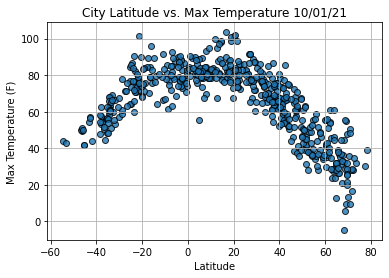

In [48]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


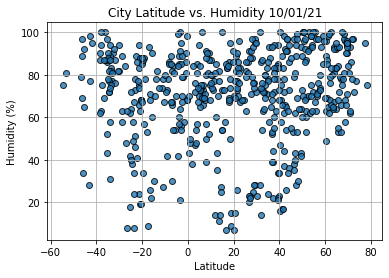

In [49]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

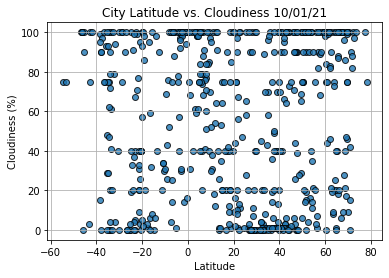

In [50]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

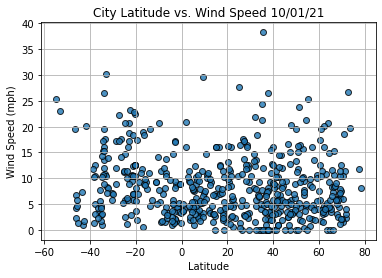

In [51]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()